In [1]:
%pylab inline
import os

Populating the interactive namespace from numpy and matplotlib


In [20]:
def load_testfile(testfile):
    nowf = open(testfile, 'r')
    bigmd_dict = {}
    grid_dict = {}
    while True:
        nowstrs = nowf.readline().split()
        #print (nowstrs)
        if nowstrs == []: break
        values = [float(nowstr) for nowstr in nowstrs[1:]]
        #cosmos = [[values[2*row],values[2*row+1] for row in range(len(values)/2)]
        if 'BigMD' in nowstrs[0]:
            bigmd_dict[nowstrs[0]] = array([[values[2*row],values[2*row+1]] for row in range(int(len(values)/2))])
        else:
            grid_dict[nowstrs[0]] = array([[values[2*row],values[2*row+1]] for row in range(int(len(values)/2))])
    return bigmd_dict, grid_dict

def mean_erbar_str(A, fmt='%.4f'):
    A0, A1 = mean(A), np.sqrt(A.var())
    return '$'+fmt%A0+'\\pm'+fmt%A1+'$'

def plot_bigmd_dict(bigmd_dict, title=None, do_plot = True):
    om_dft, sig8_dft = 0.307115, 0.8228
    keys = list(bigmd_dict.keys())
    if do_plot:
        fig, ax = subplots(figsize=(10,6))
        ax.scatter([om_dft], [sig8_dft], s=50, marker='*', c='r', 
            label='\ntest_input: \n  ('+str(om_dft)+', '+str(sig8_dft)+')')
    om_sig8s = np.ones((len(keys),2)); ikey = 0
    for key in keys:
        A = bigmd_dict[key]; om_sig8s[ikey,0] = A[:,0].mean(); om_sig8s[ikey,1] = A[:,1].mean(); ikey+=1
        if ikey==1 and do_plot: 
            ax.scatter(A[:,0],A[:,1], c='r', s=5, 
                label='\n\nsubcube_outputs_cosmology1: \n   $\\Omega_m$='+mean_erbar_str(A[:,0])+\
                       '  \n   $\\sigma_8$='+mean_erbar_str(A[:,1]))
    if do_plot:
        ax.scatter(om_sig8s[:,0], om_sig8s[:,1], c='b', s=5, 
                label='\n\ntest_predicts: \n   $\\Omega_m$='+mean_erbar_str(om_sig8s[:,0])+\
                   '  \n   $\\sigma_8$='+mean_erbar_str(om_sig8s[:,1]))
        if title != None: ax.set_title(title,fontsize=14)
        ax.grid(); ax.set_xlabel(r'$\Omega_m$', fontsize=16); 
        ax.set_ylabel(r'$\sigma_8$', fontsize=16); 
        ax.legend(loc='best')
        ax.set_xlim(0.22, 0.35); ax.set_ylim(0.66, 0.88)
    return mean(om_sig8s[:,0]), np.sqrt(om_sig8s[:,0].var()),\
        mean(om_sig8s[:,1]), np.sqrt(om_sig8s[:,1].var())

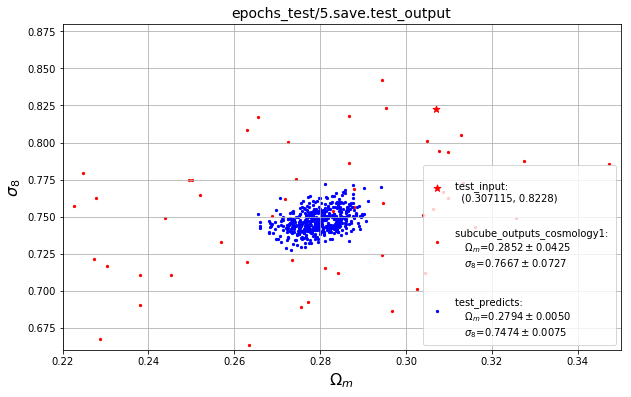

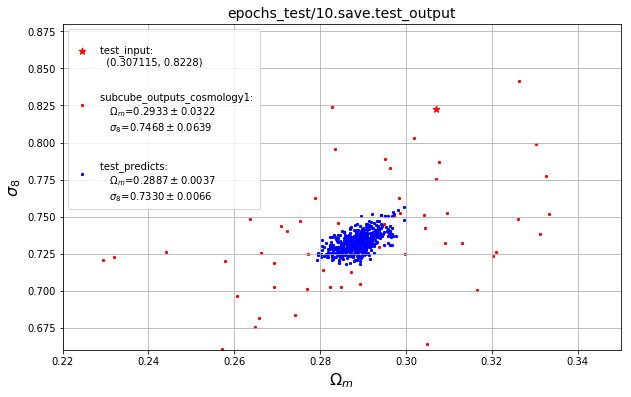

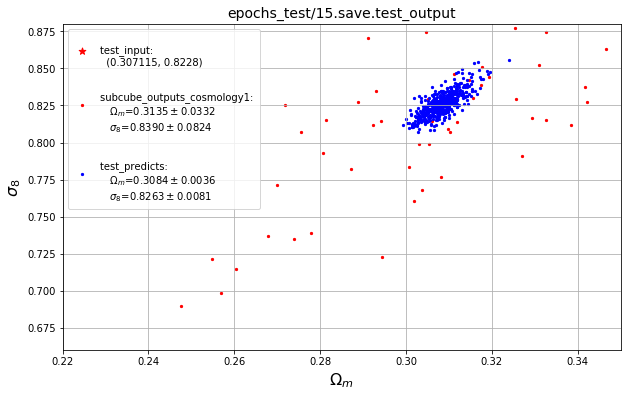

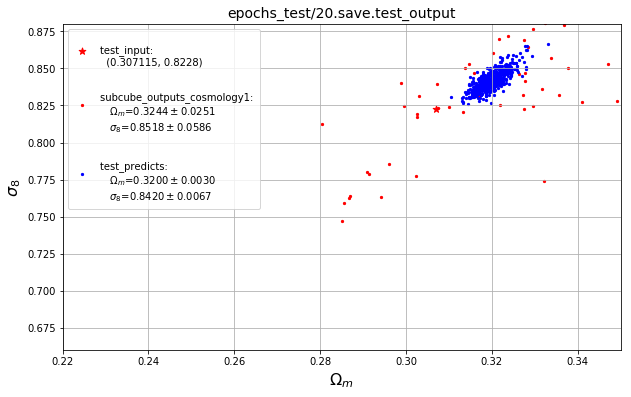

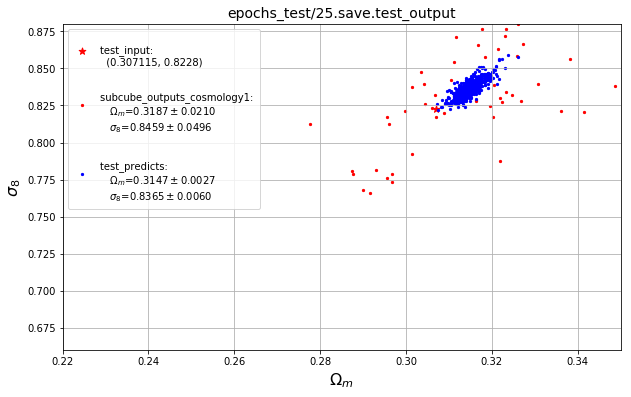

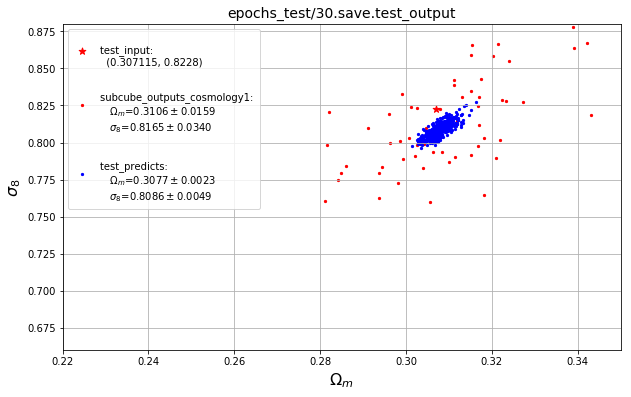

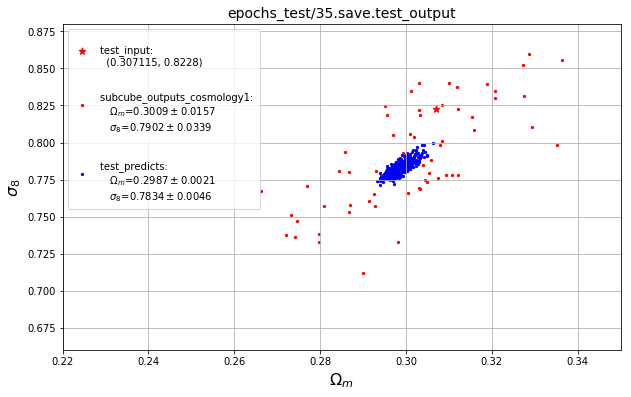

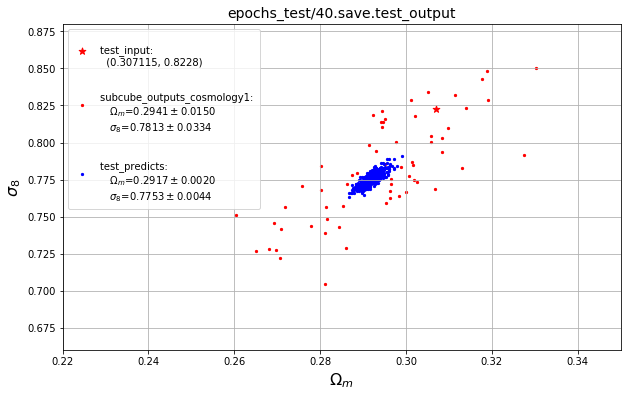

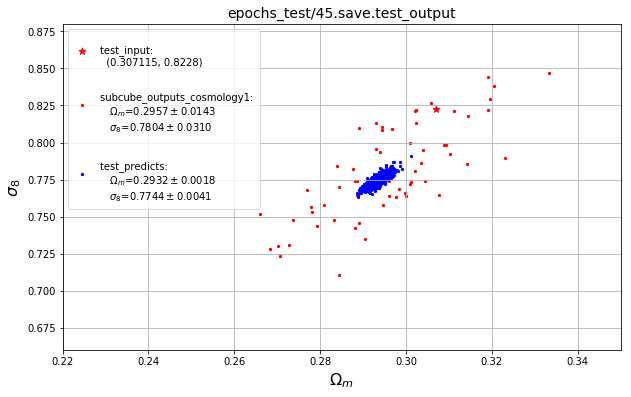

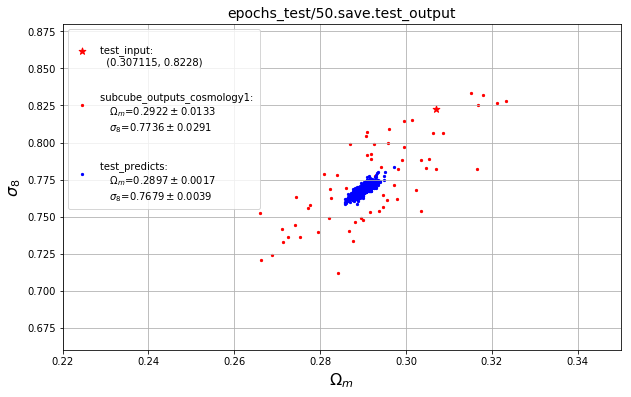

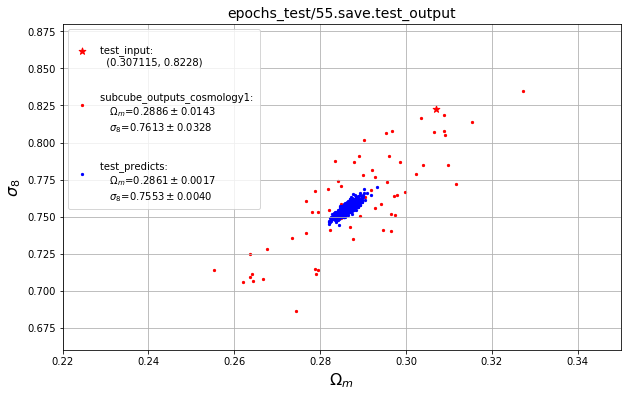

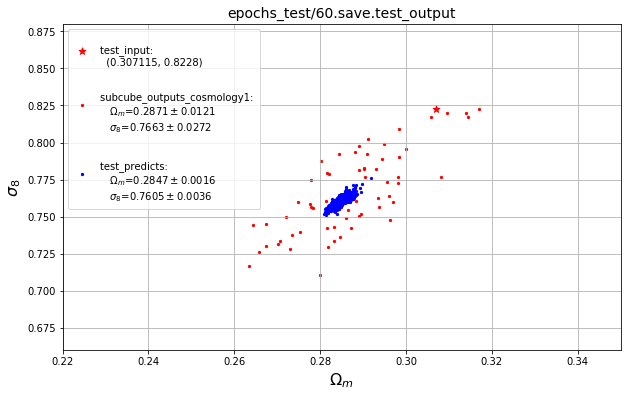

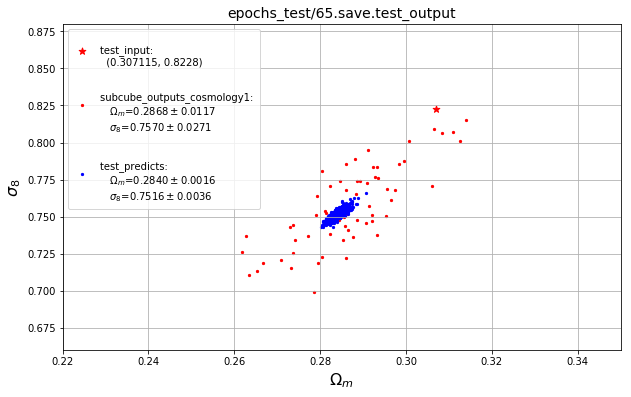

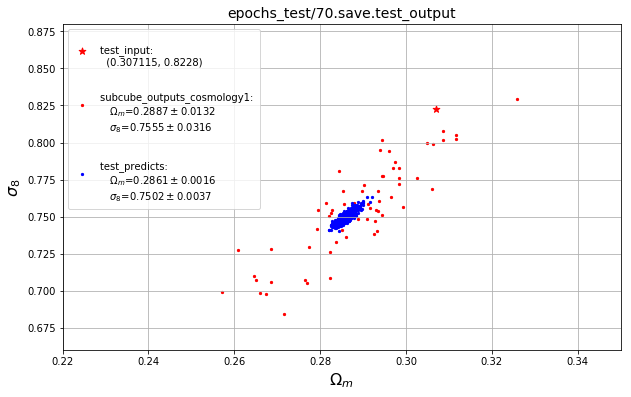

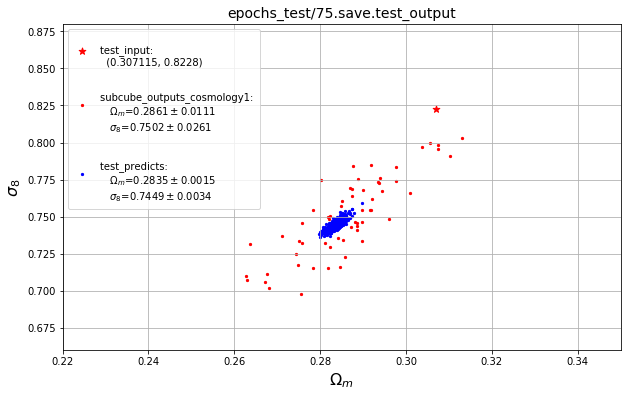

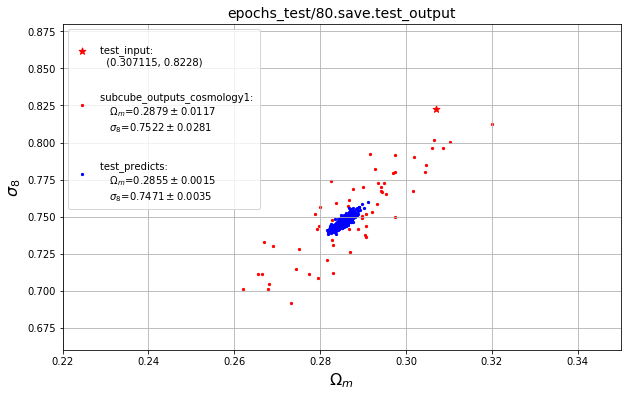

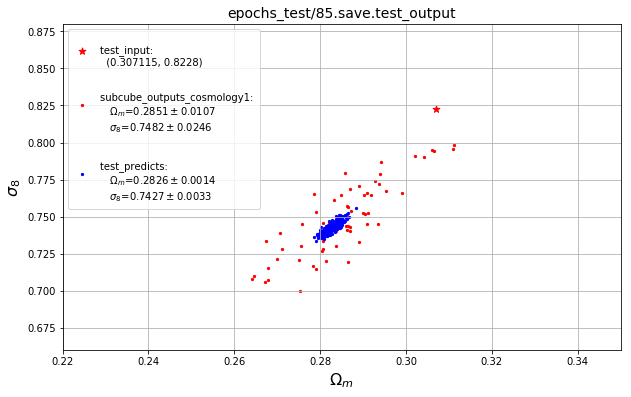

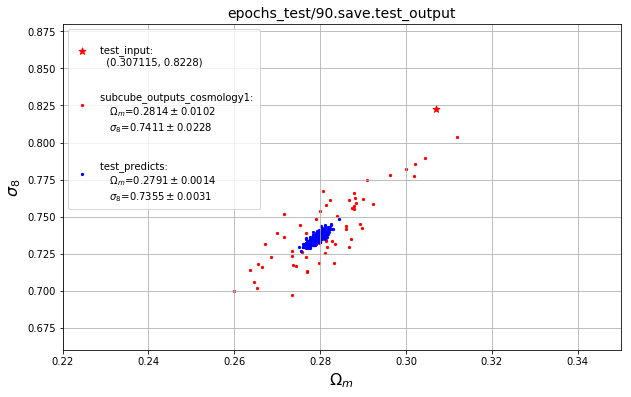

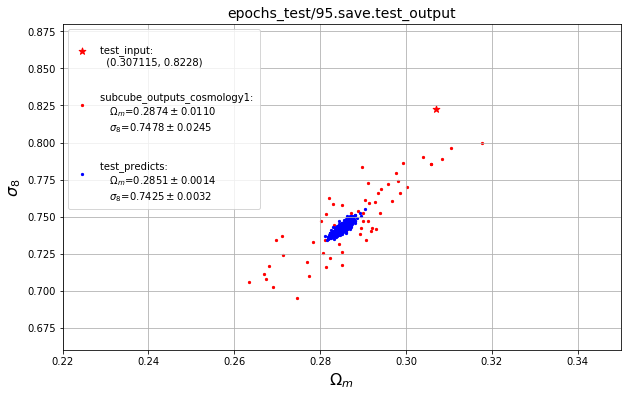

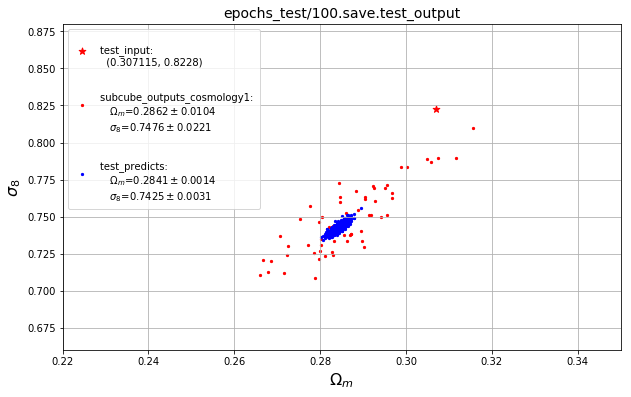

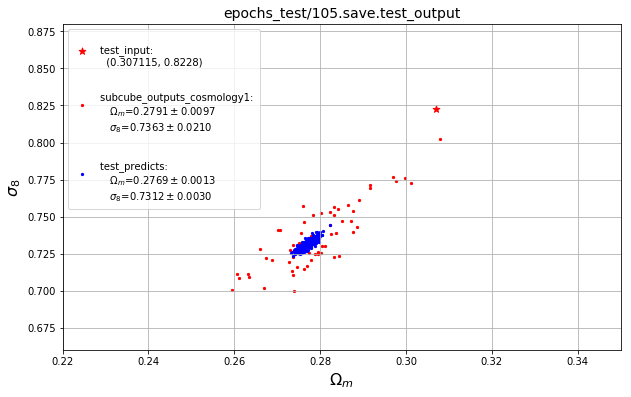

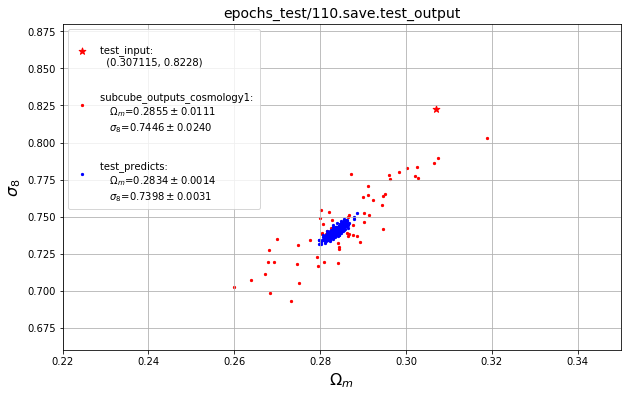

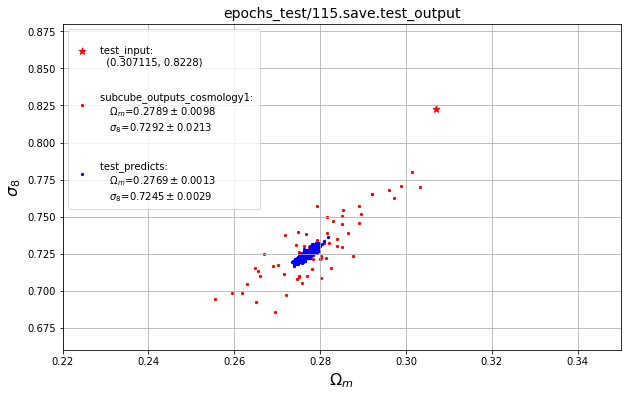

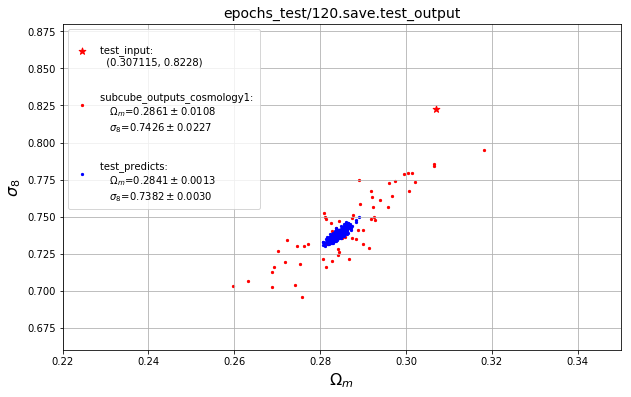

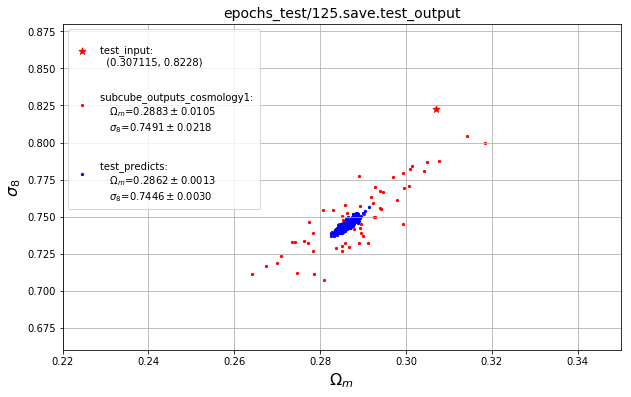

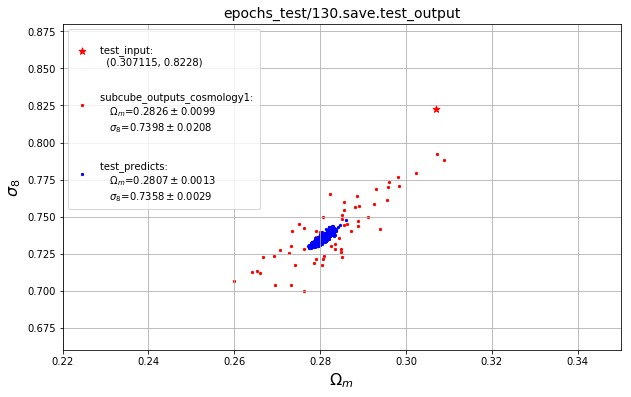

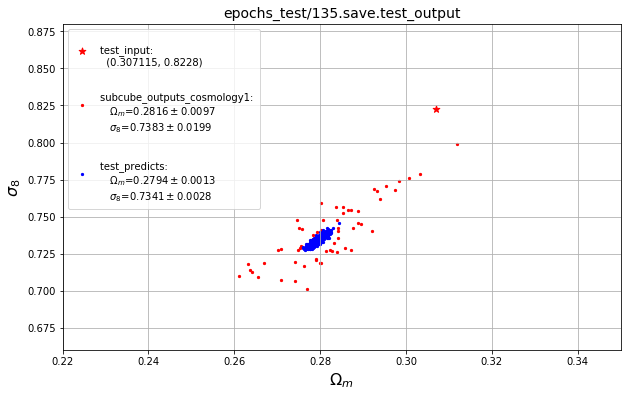

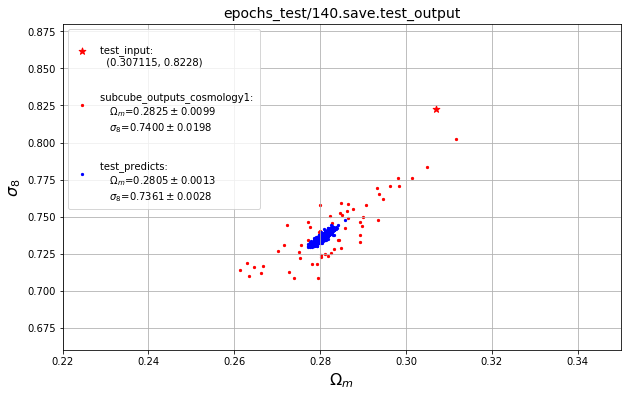

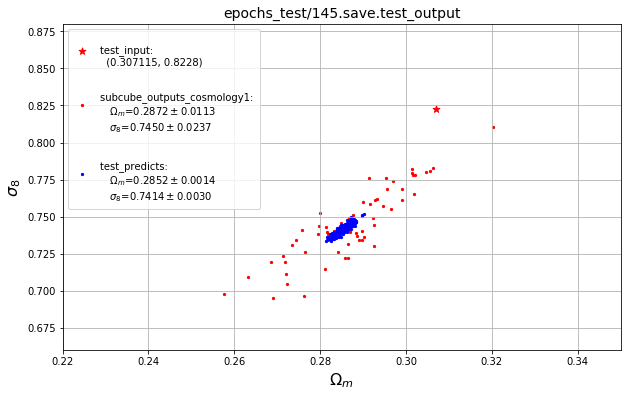

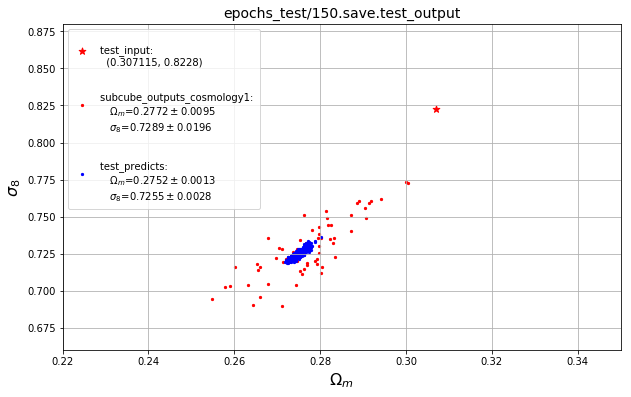

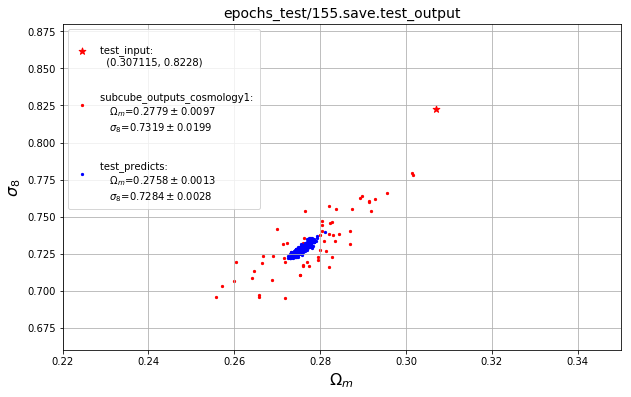

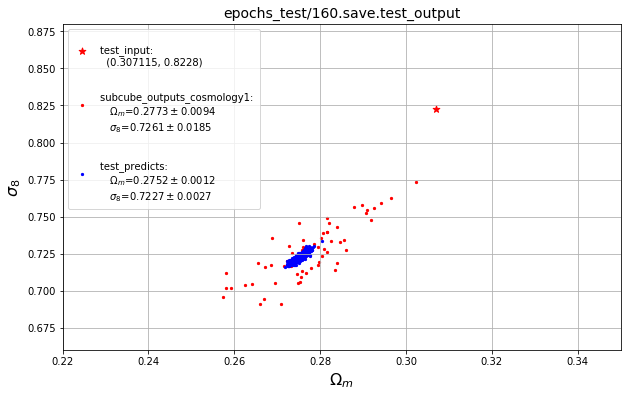

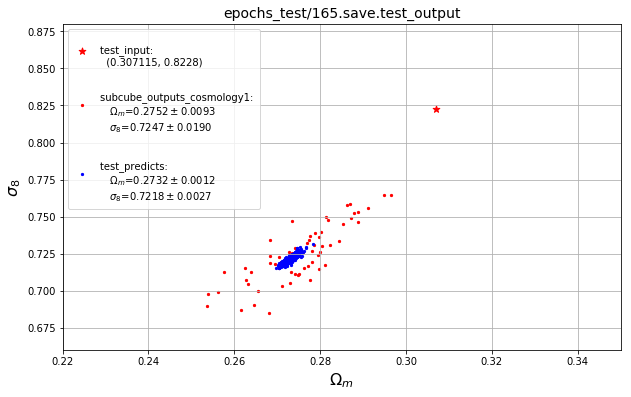

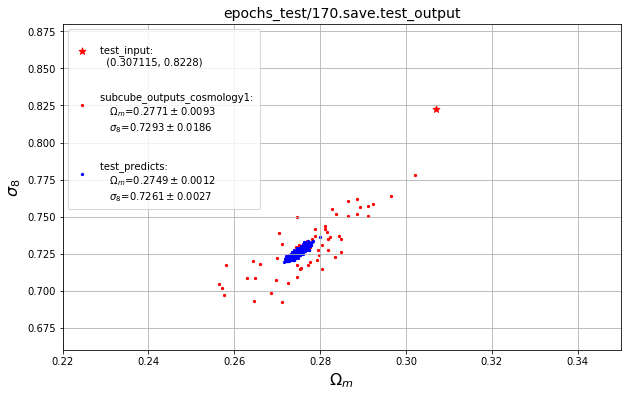

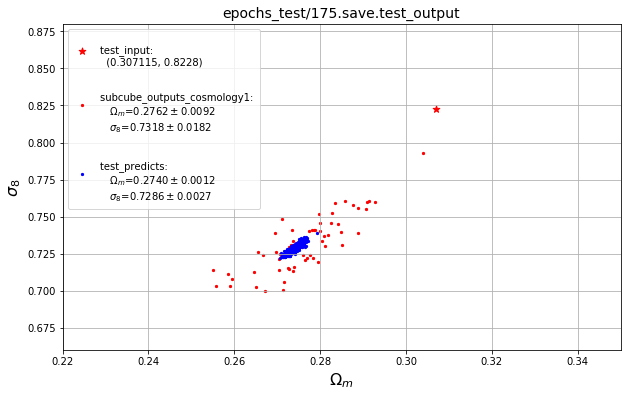

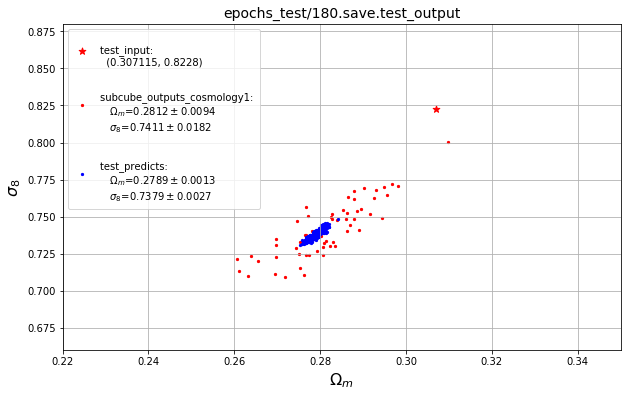

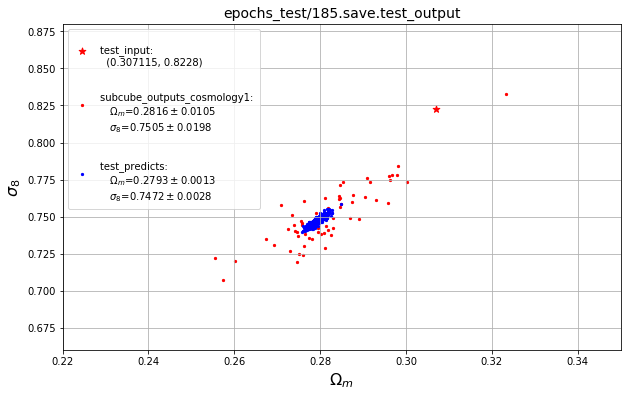

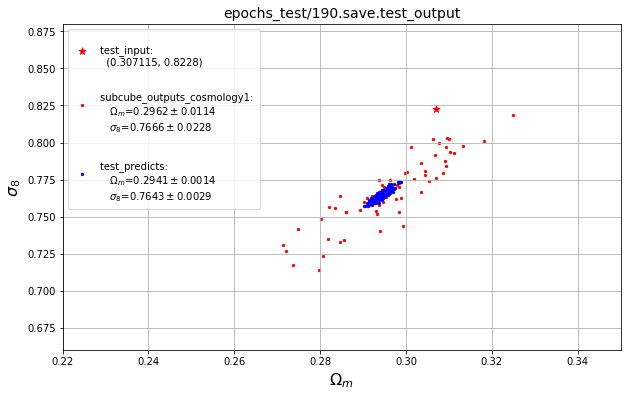

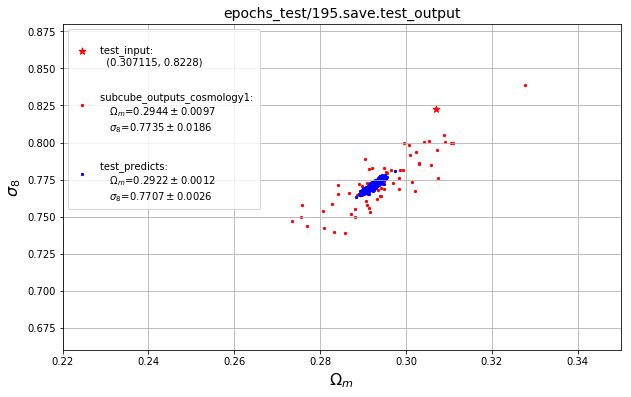

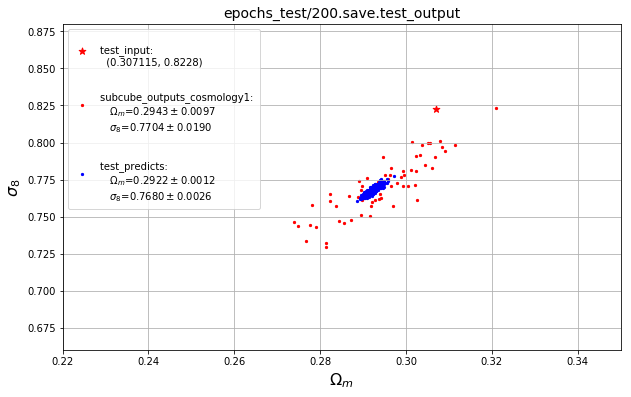

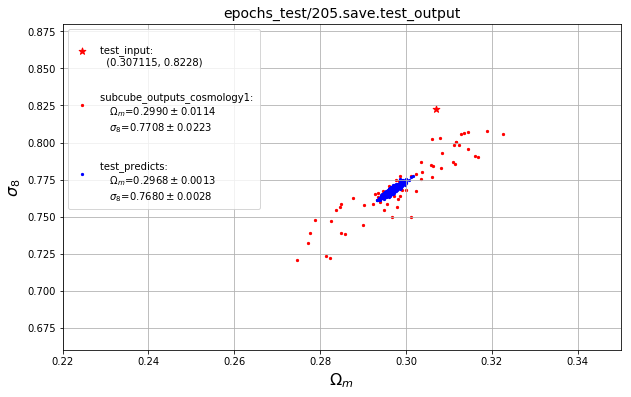

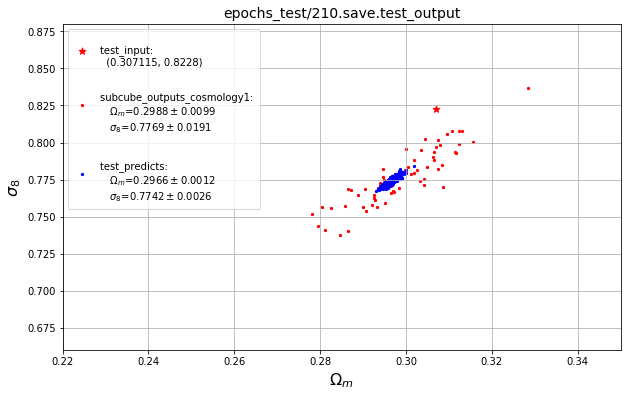

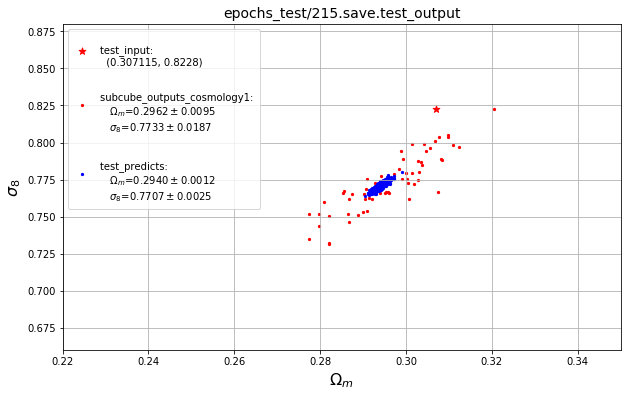

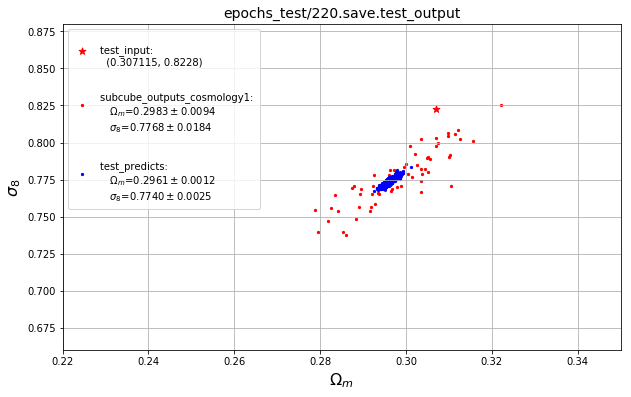

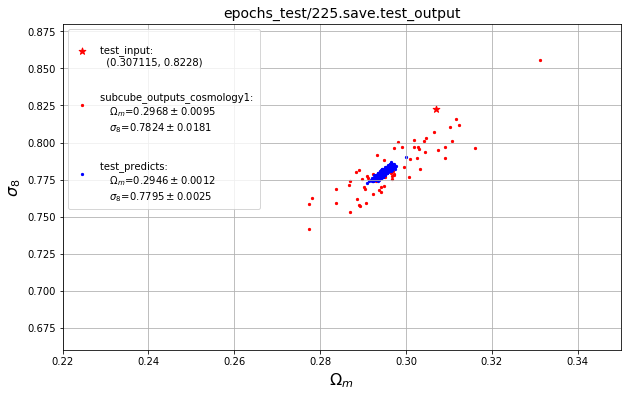

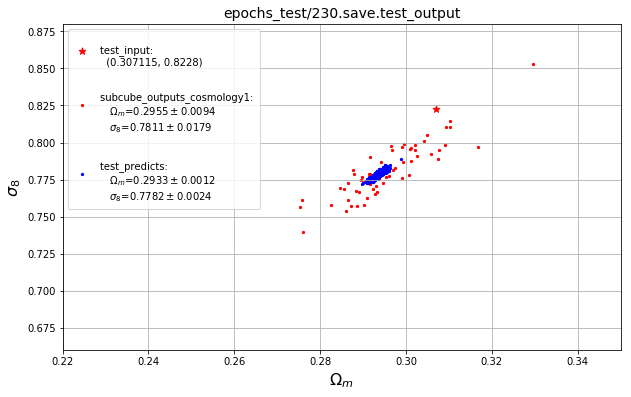

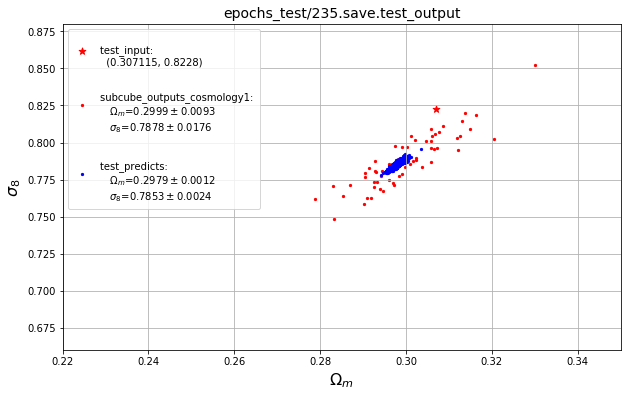

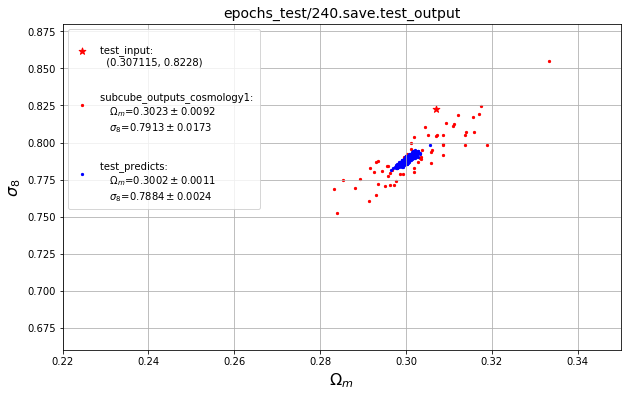

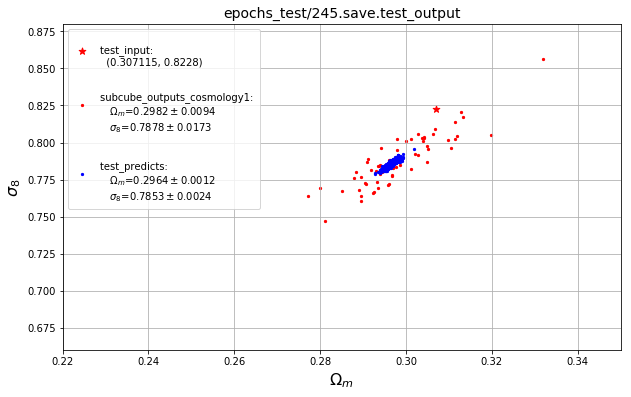

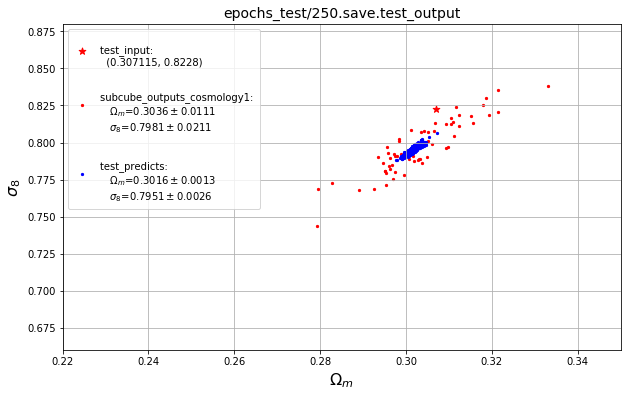

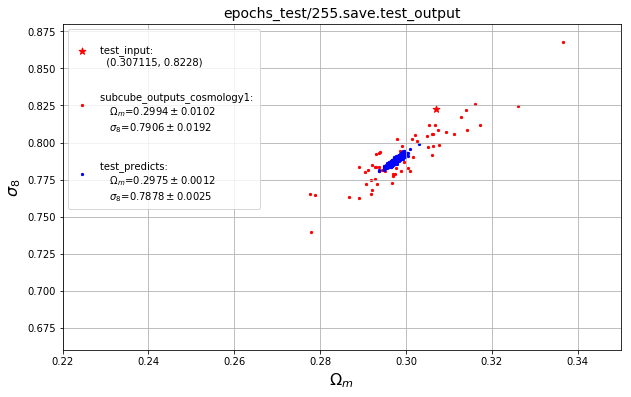

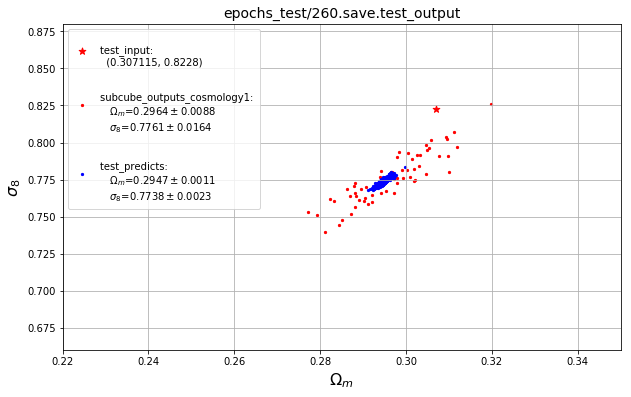

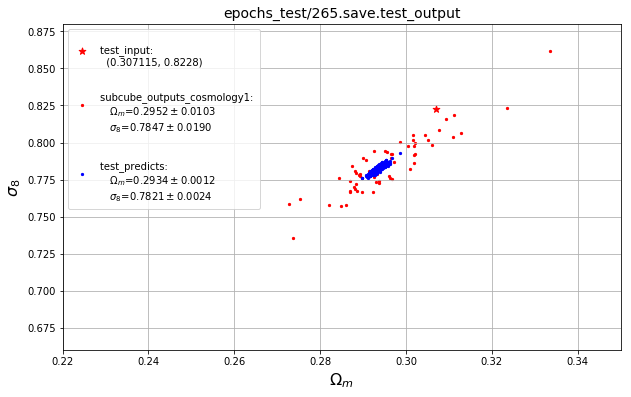

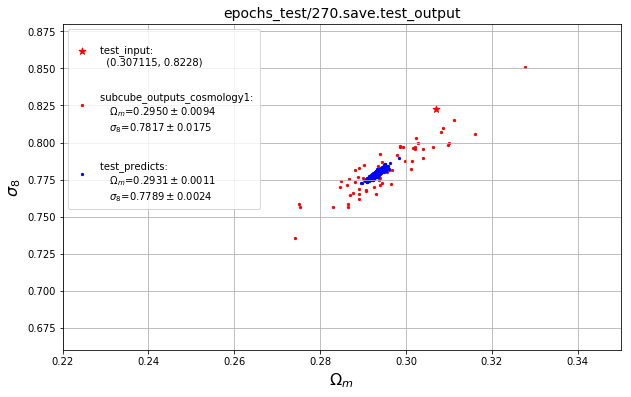

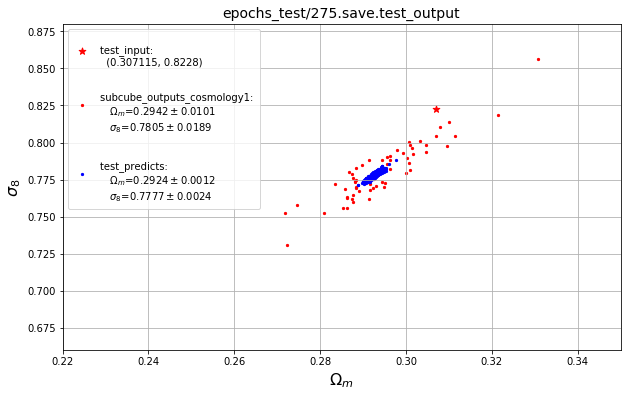

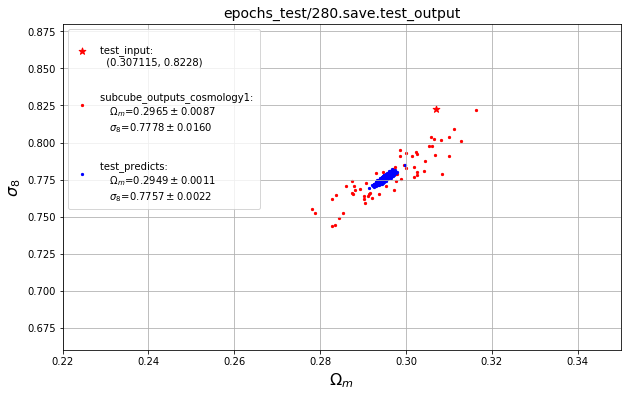

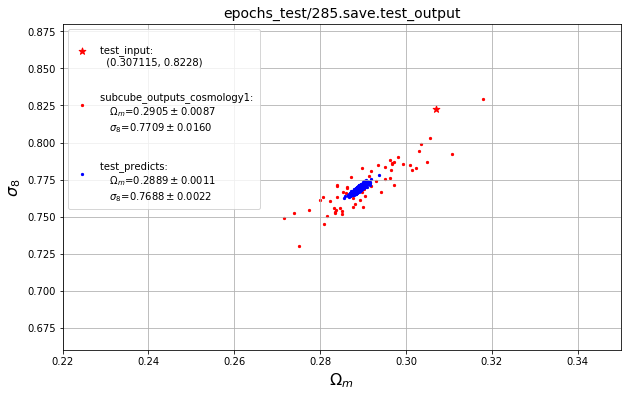

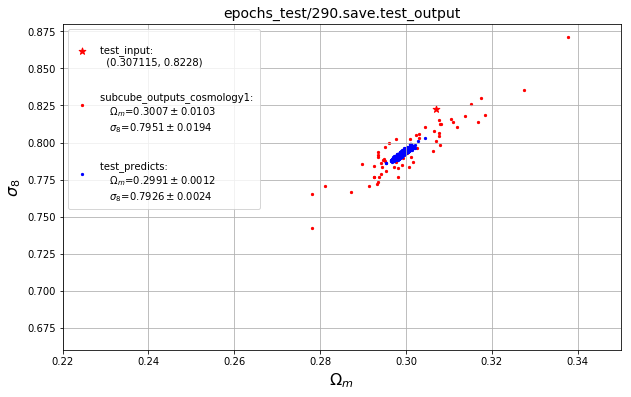

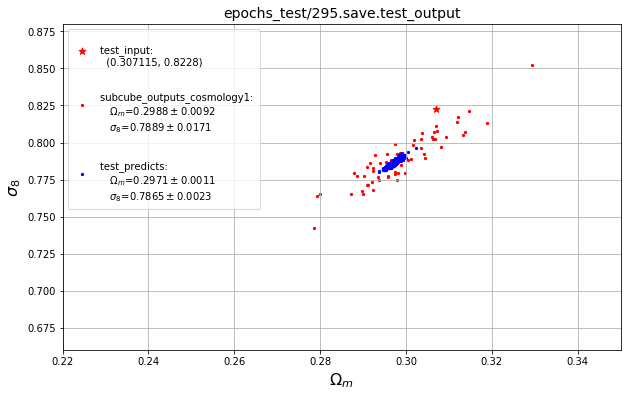

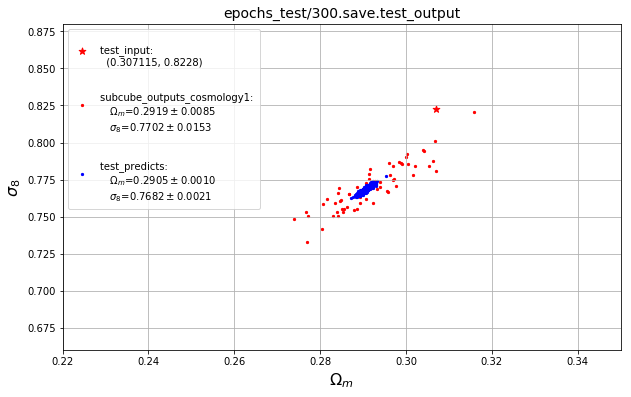

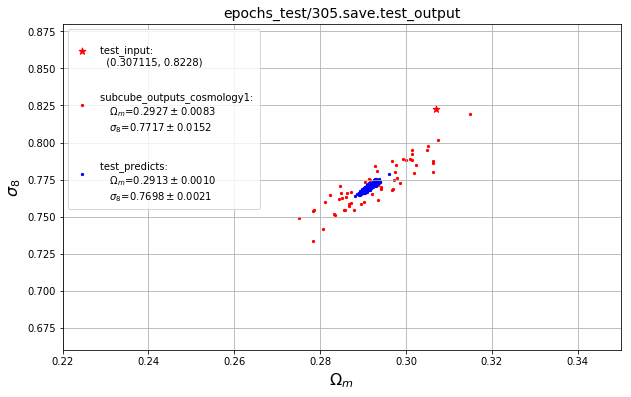

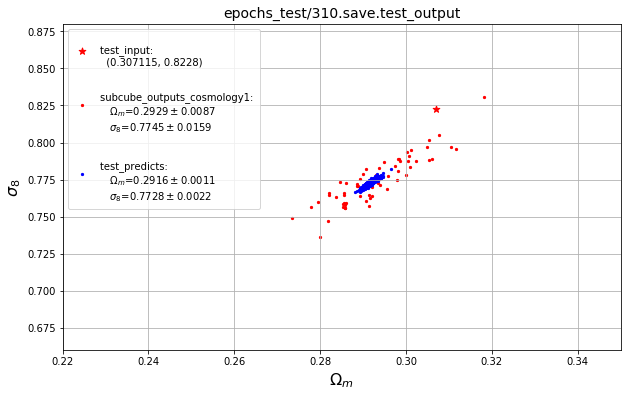

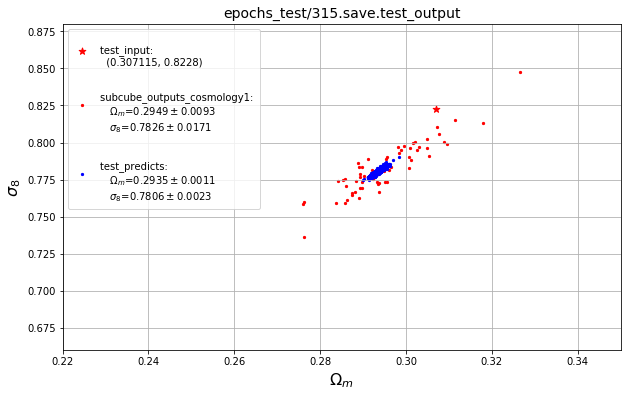

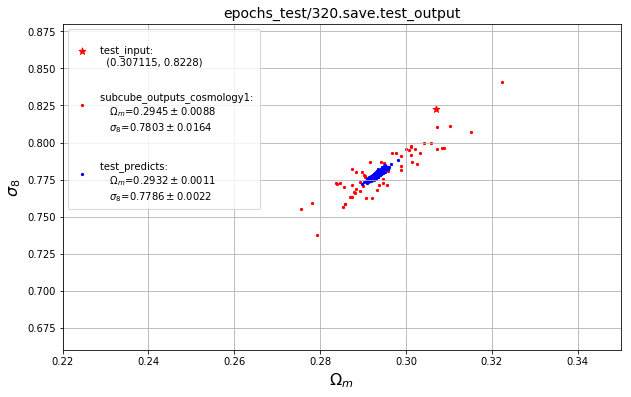

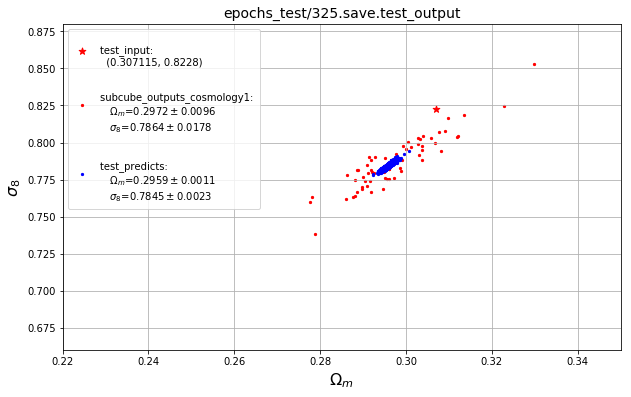

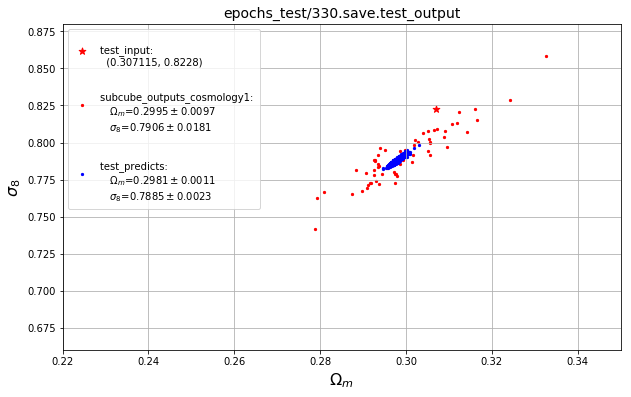

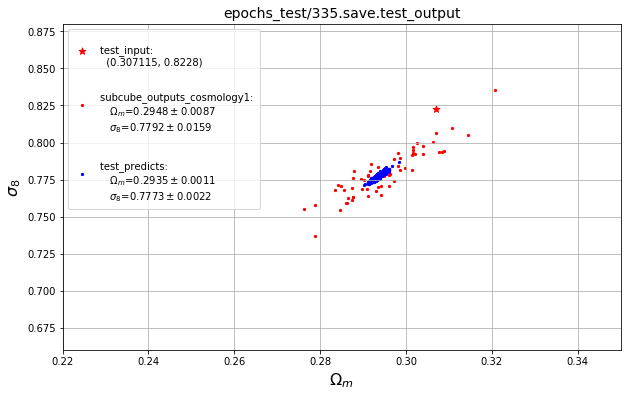

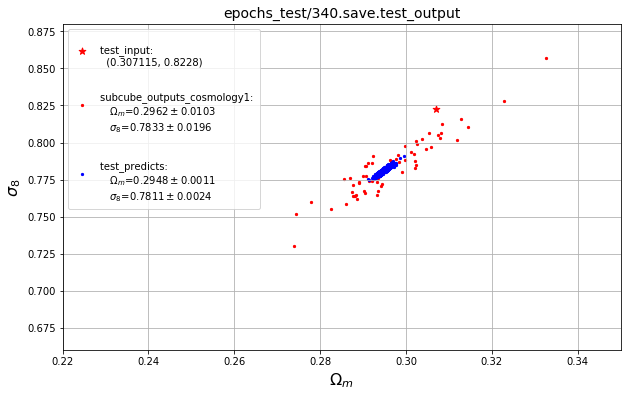

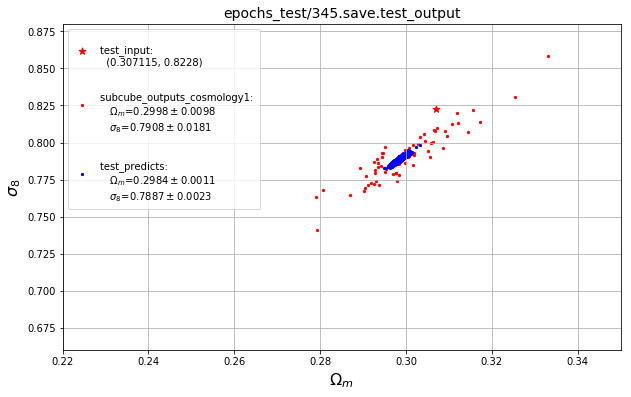

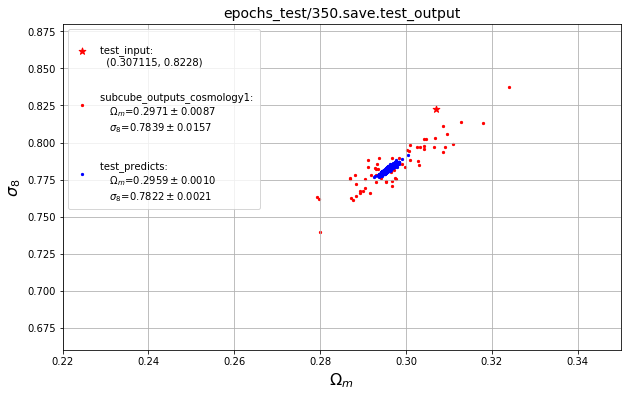

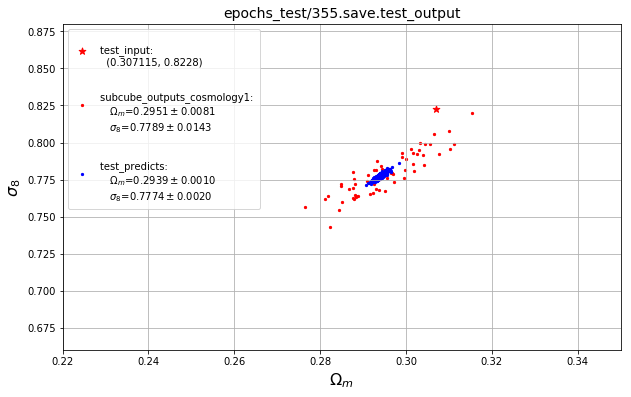

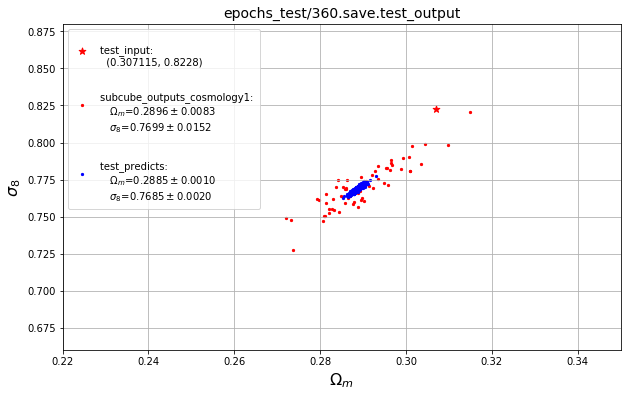

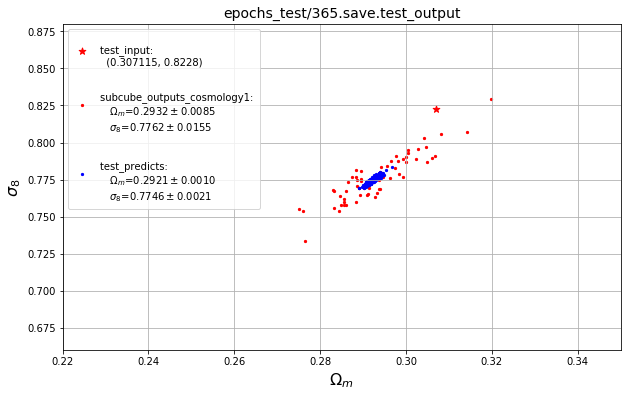

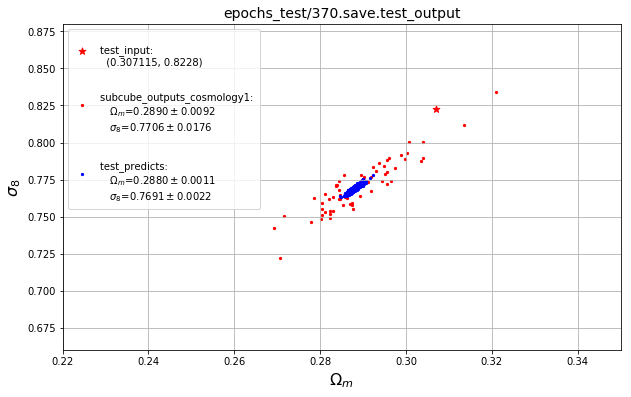

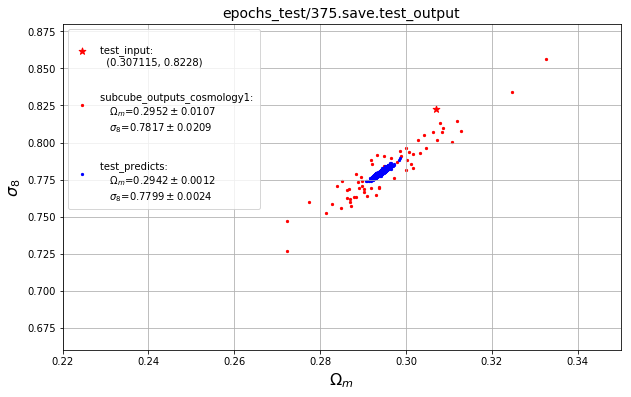

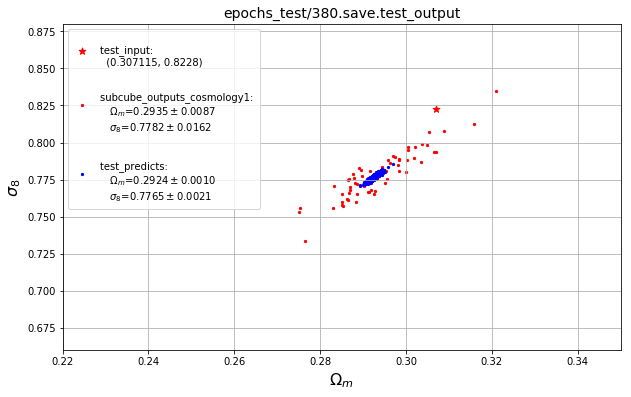

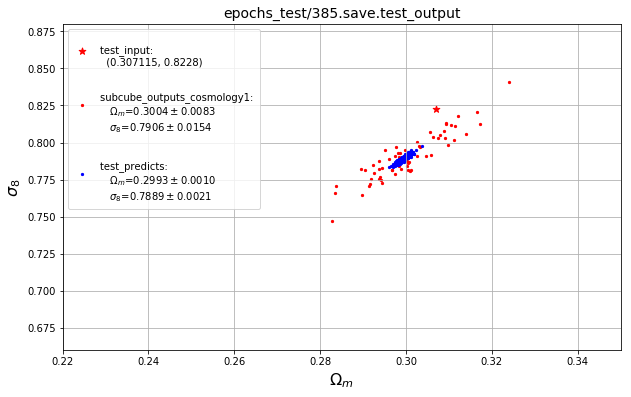

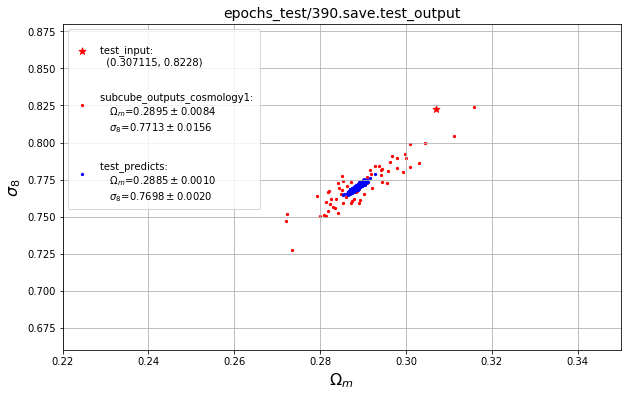

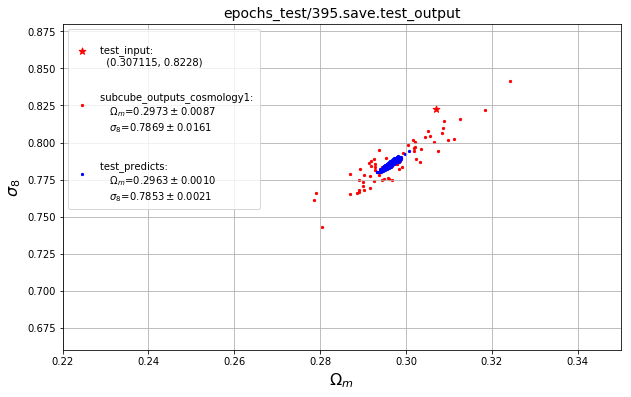

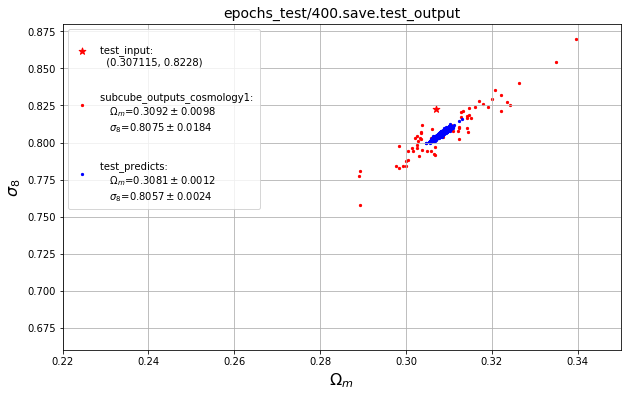

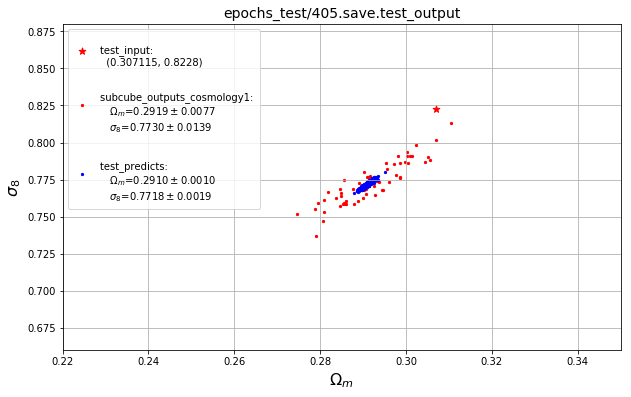

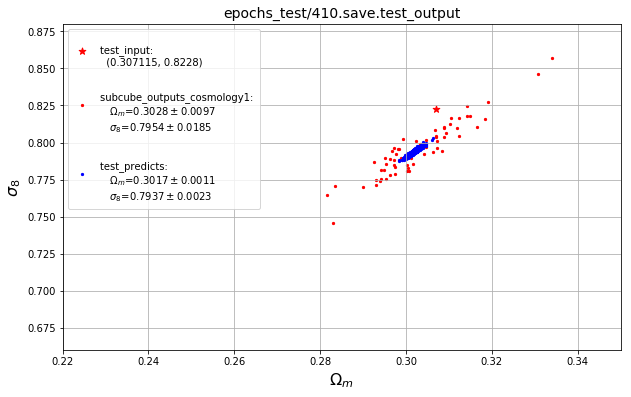

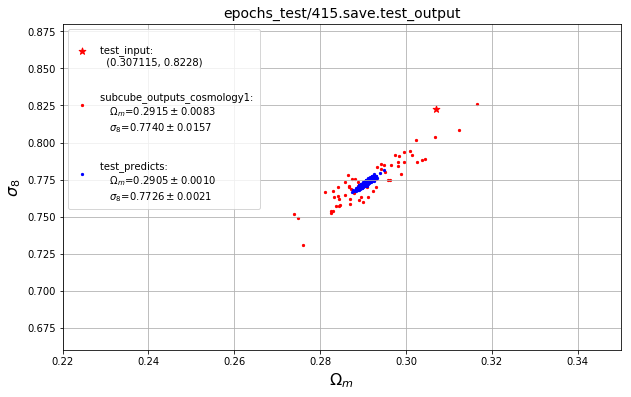

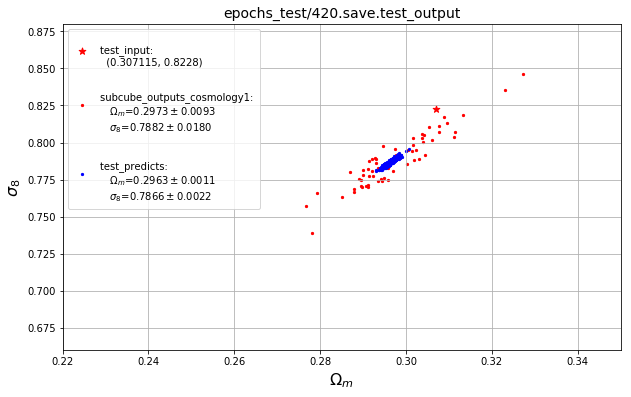

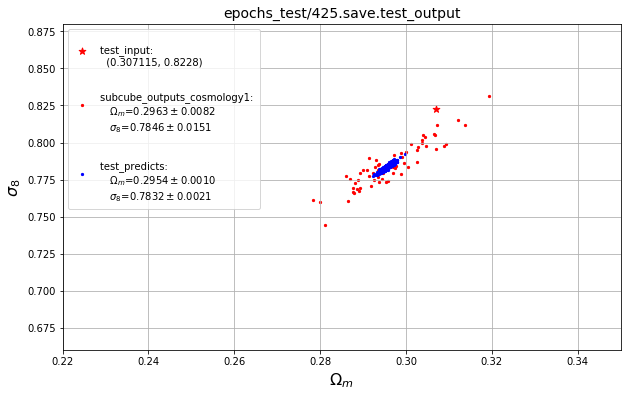

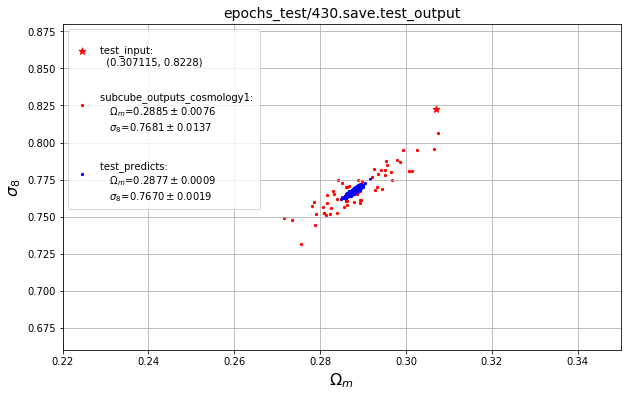

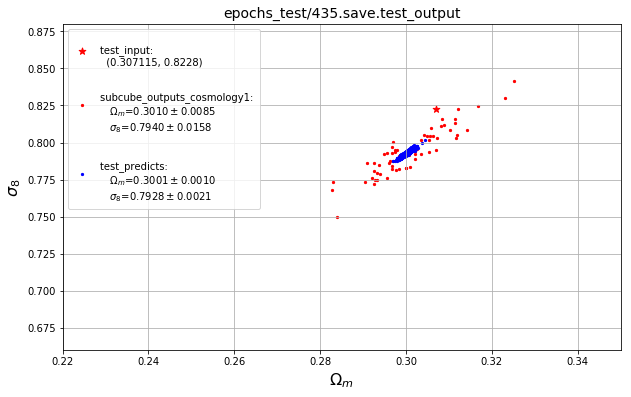

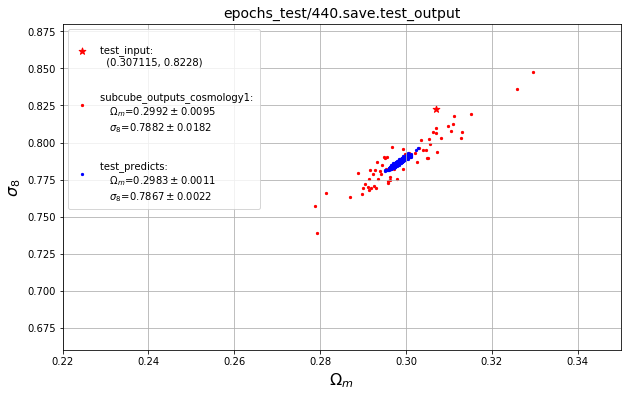

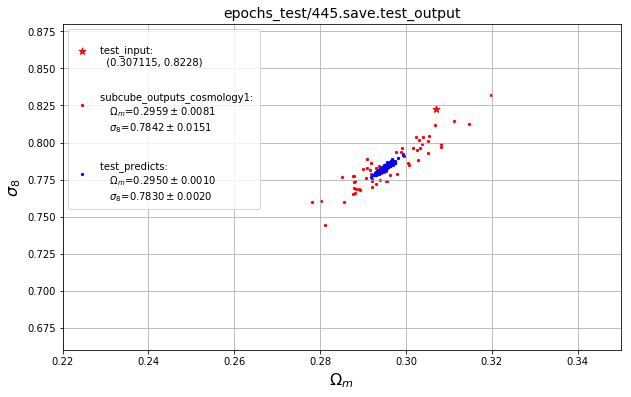

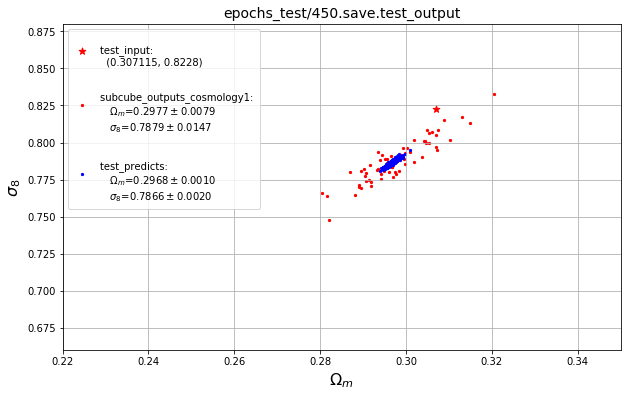

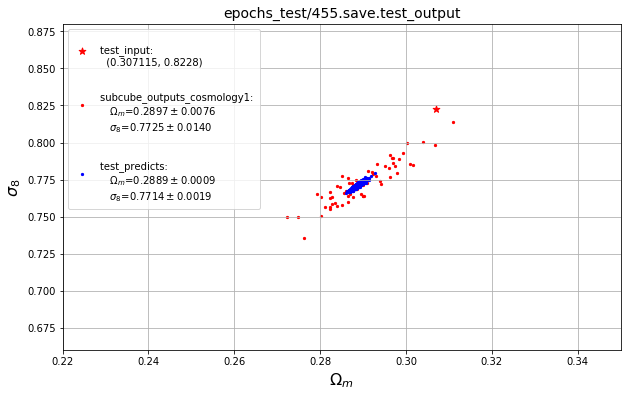

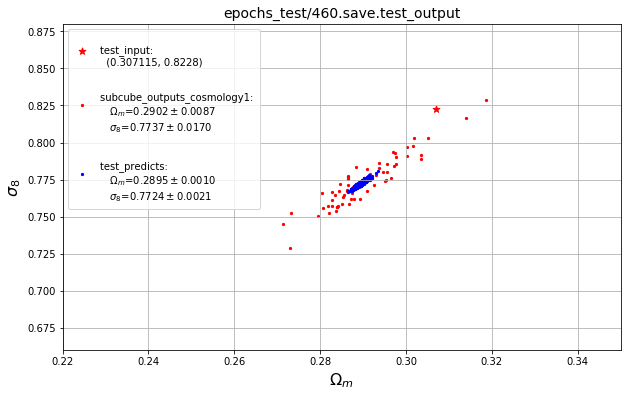

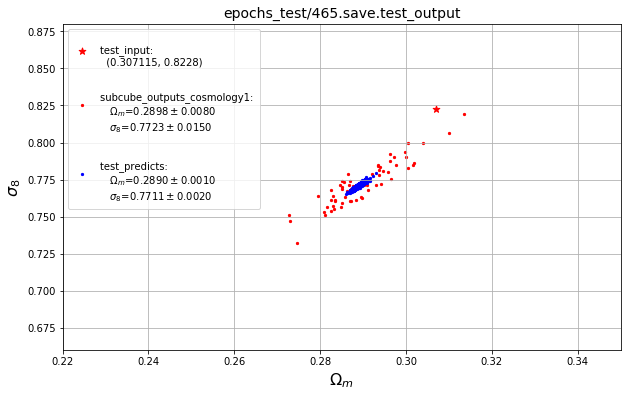

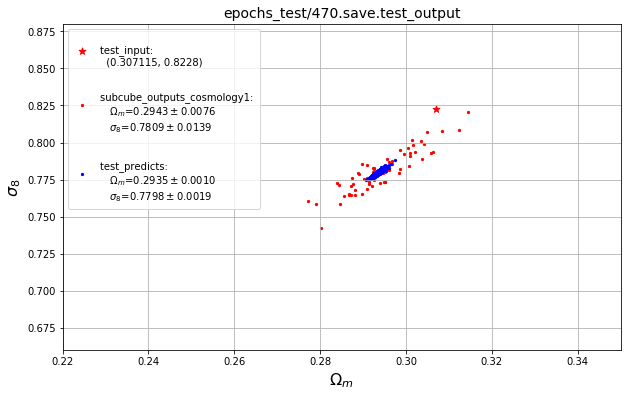

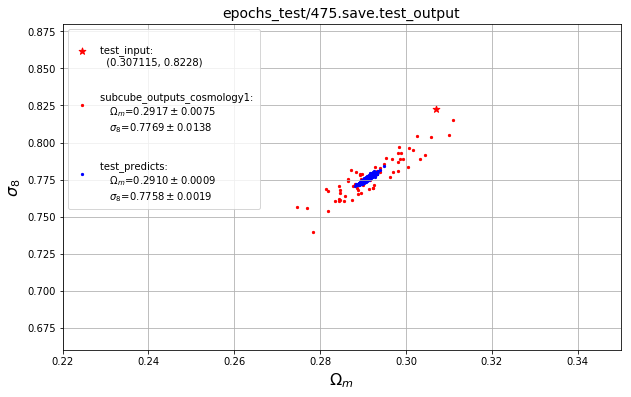

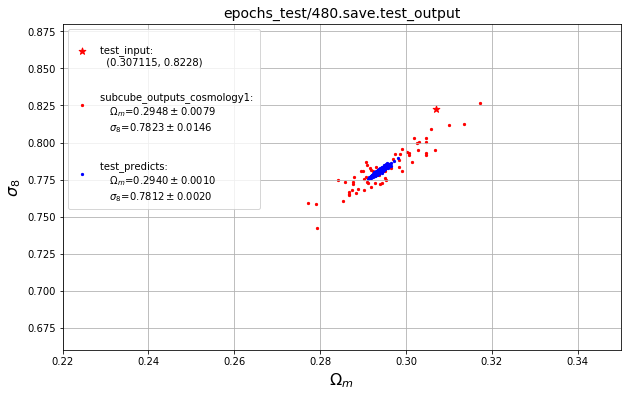

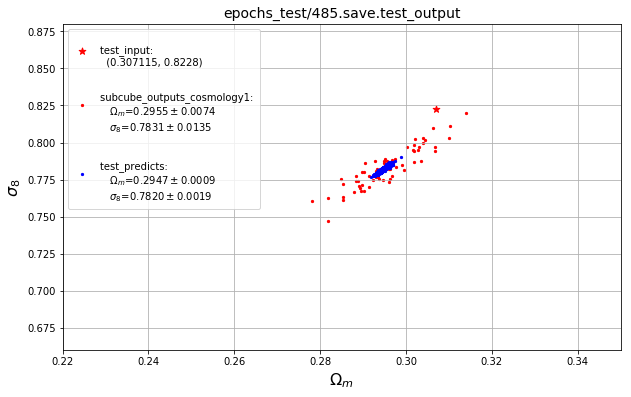

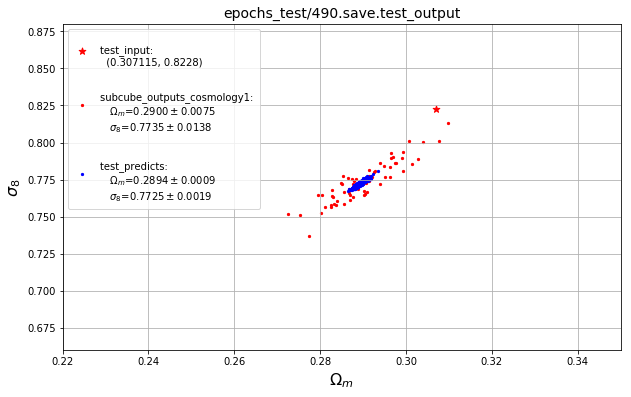

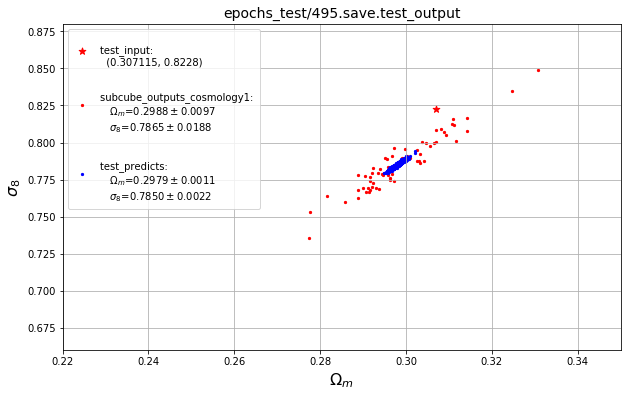

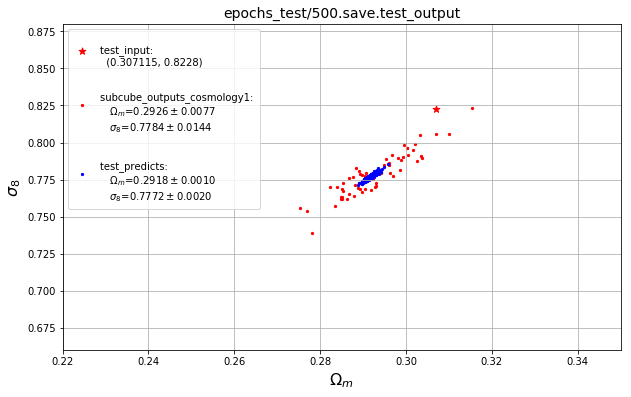

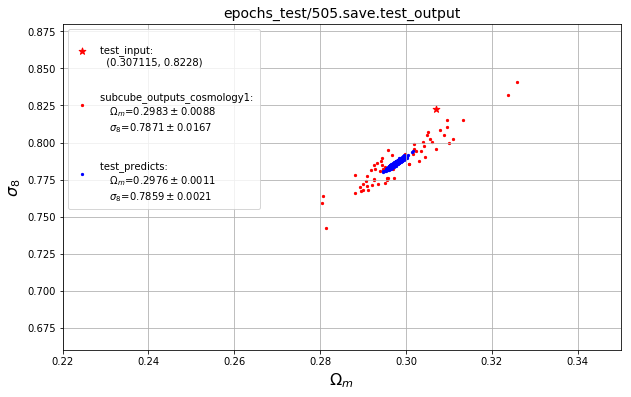

In [3]:
epochs_list = range(5,510,5)
rlts = []
for epochs in epochs_list:
    file = 'epochs_test/'+str(epochs)+'.save.test_output'
    bigmd_dict, grid_dict = load_testfile(file)
    om, omer, sig8, sig8er = plot_bigmd_dict(bigmd_dict, title=file); plt.show()
    rlts.append([om, omer, sig8, sig8er])

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


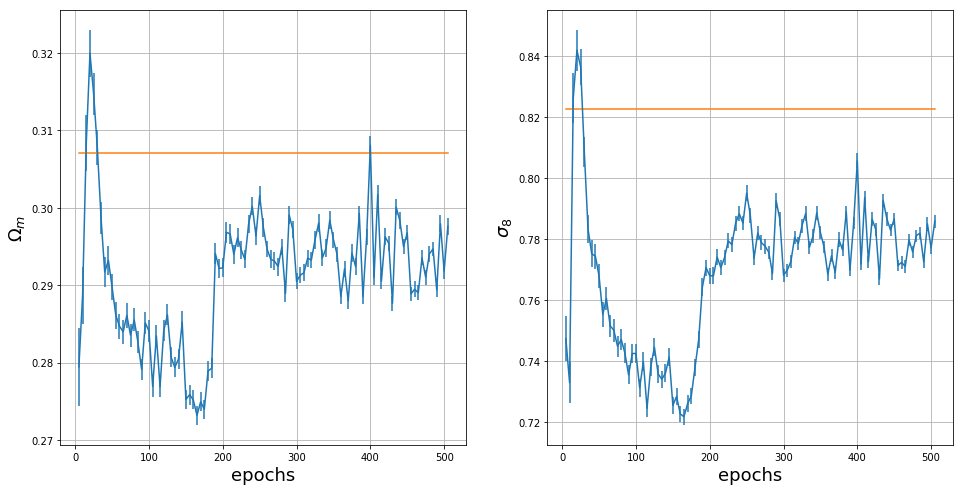

In [5]:
rlts = array(rlts)
fig, axs = subplots(1,2, figsize=(16,8)); ax1, ax2 = axs
ax1.errorbar(epochs_list, rlts[:,0], rlts[:,1])
ax1.plot(epochs_list, [0.3071 for xx in epochs_list])
ax2.errorbar(epochs_list, rlts[:,2], rlts[:,3])
ax2.plot(epochs_list, [0.8228 for xx in epochs_list])

ax1.grid();ax2.grid();
ax1.set_ylabel('$\\Omega_m$', fontsize=18)
ax2.set_ylabel('$\\sigma_8$', fontsize=18)
ax1.set_xlabel('epochs', fontsize=18); ax2.set_xlabel('epochs', fontsize=18)

fig.show()

In [72]:
def learningcurve(filename_function, var_list, var_name = 'epochs', curve_name = '',
                 fig =None, axs=None, ls='-'):
    rlts = []; X = []
    for var in var_list:
        try:
            bigmd_dict, grid_dict = load_testfile(filename_function(var))
            om, omer, sig8, sig8er = plot_bigmd_dict(bigmd_dict, title=filename_function(var), do_plot=False); 
            rlts.append([om, omer, sig8, sig8er]); X.append(var)
        except:
            pass
    rlts = array(rlts)
    if fig == None:
        fig, axs = subplots(1,2, figsize=(16,8))
    ax1, ax2 = axs
    ax1.errorbar(X, rlts[:,0], rlts[:,1], label=curve_name, ls=ls)
    ax1.plot(X, [0.3071 for xx in X], lw=2, c='k')
    ax2.errorbar(X, rlts[:,2], rlts[:,3], label=curve_name, ls=ls)
    ax2.plot(X, [0.8228 for xx in X], lw=2, c='k')

    ax1.grid(b=True);ax2.grid(b=True);
    ax1.set_ylabel('$\\Omega_m$', fontsize=18)
    ax2.set_ylabel('$\\sigma_8$', fontsize=18)
    ax1.set_xlabel(var_name, fontsize=18); ax2.set_xlabel(var_name, fontsize=18)
    ax1.legend(fontsize=16)
    fig.show()
    return fig, axs, X, rlts

##### default settings

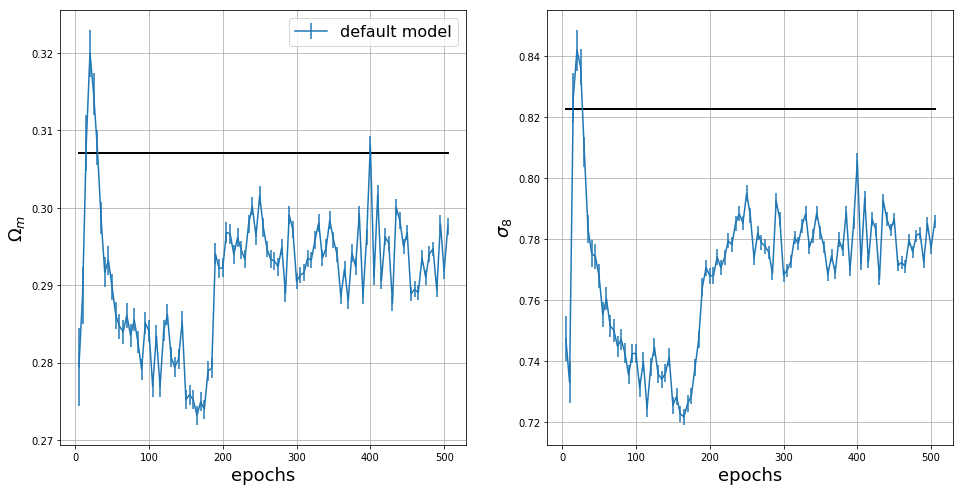

In [103]:
def filename_function(epochs):
    return 'epochs_test/'+str(epochs)+'.save.test_output'
fig = None
fig, axs, epochs_list, epochs_list_rlts = \
    learningcurve(filename_function, range(5,510,5), var_name = 'epochs', 
                  curve_name = 'default model')

##### sgd

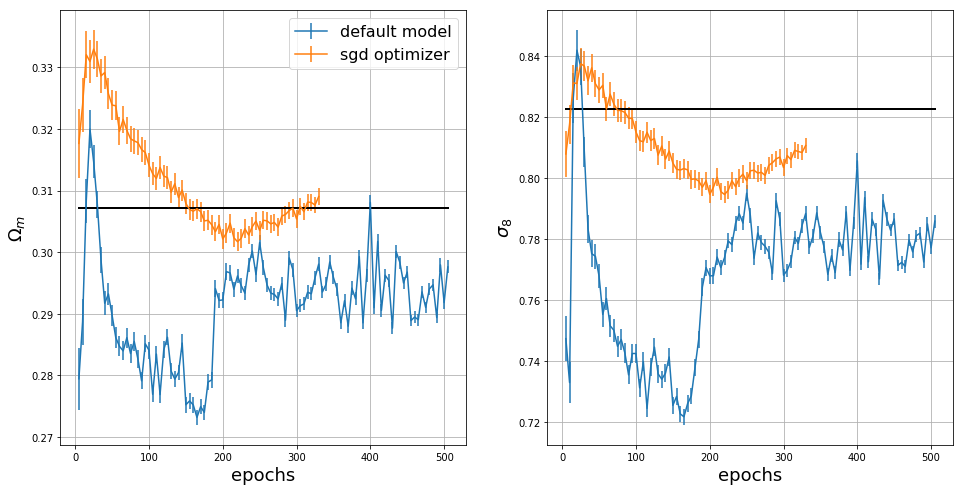

In [104]:
def filename_function(epochs):
    return 'sgd/'+str(epochs)+'.save.test_output'
fig, axs, sgd_epochs_list, sgd_epochs_list_rlts = \
    learningcurve(filename_function, range(5,515,5), var_name = 'epochs', 
                  curve_name = 'sgd optimizer', fig=fig, axs=axs)
fig.savefig('sgd.png', format='png')
fig

##### default, laptop

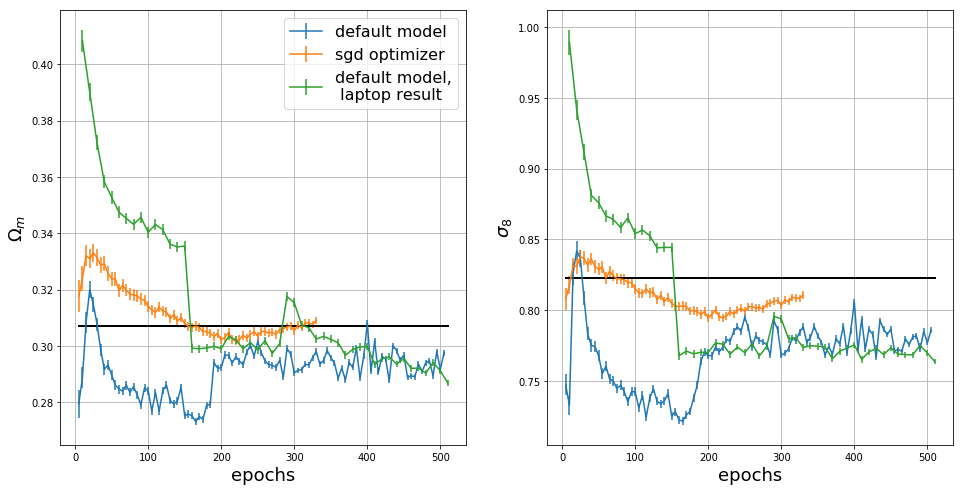

In [105]:
def filename_function(epochs):
    return 'epochs_xiaodonglaptop/'+str(epochs)+'.save.test_output'
fig, axs, epochs_list, epochs_list_rlts = \
    learningcurve(filename_function, range(5,1000,5), var_name = 'epochs', 
                  curve_name = 'default model,\n laptop result', fig=fig, axs=axs)
fig.savefig('sgd_laptopresult.png', format='png')
fig

##### max pooling

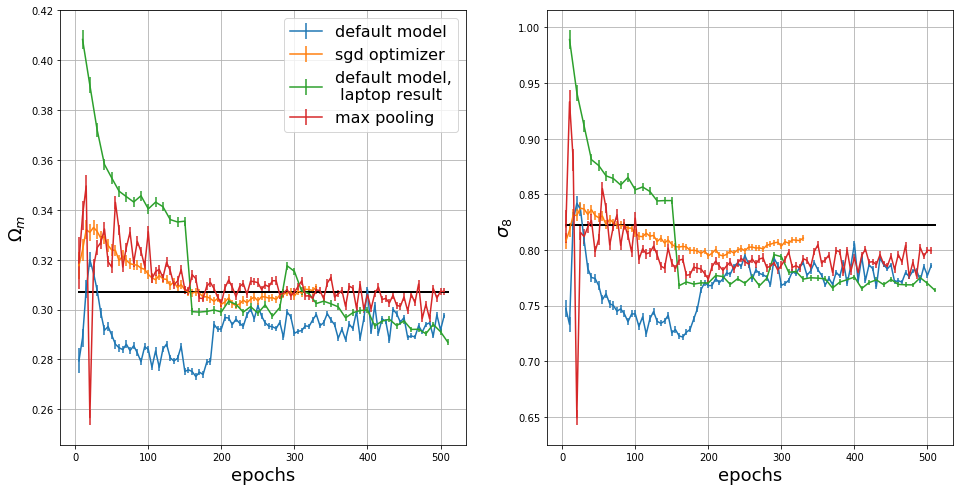

In [106]:
def filename_function(epochs):
    return 'max_pooling/'+str(epochs)+'.save.test_output'
fig, axs, epochs_list, epochs_list_rlts = \
    learningcurve(filename_function, range(5,1000,5), var_name = 'epochs', 
                  curve_name = 'max pooling', fig=fig, axs=axs)
fig.savefig('sgd_laptopresult_maxpool.png', format='png')
fig

##### default again

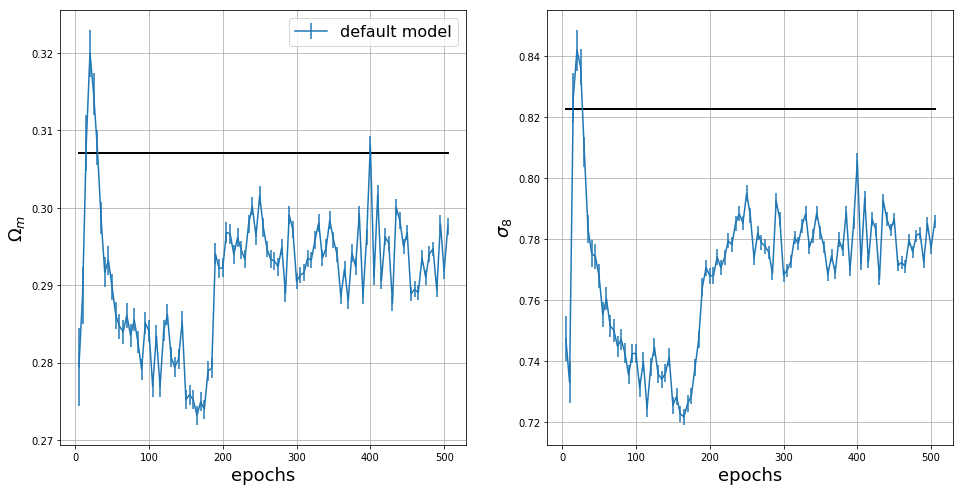

In [112]:
def filename_function(epochs):
    return 'epochs_test/'+str(epochs)+'.save.test_output'
fig = None
fig, axs, epochs_list, epochs_list_rlts = \
    learningcurve(filename_function, range(5,510,5), var_name = 'epochs', 
                  curve_name = 'default model')

##### half filter

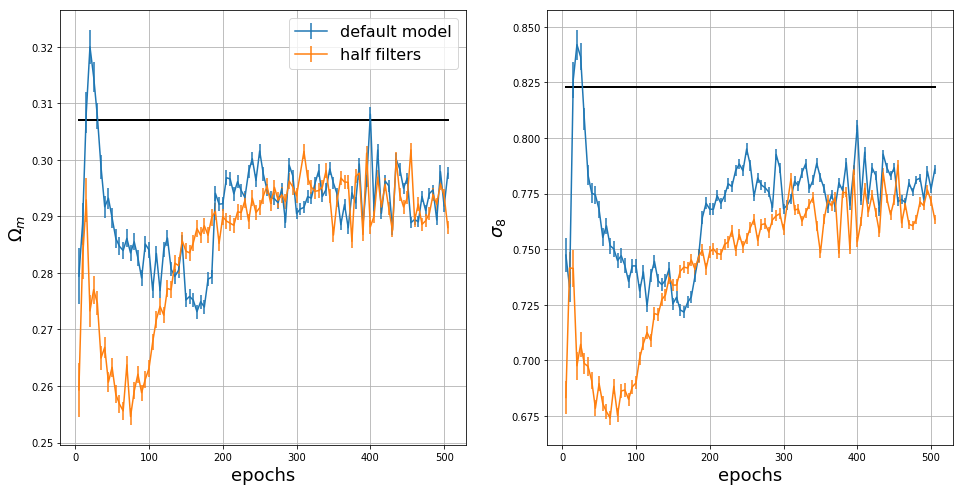

In [113]:
def filename_function(epochs):
    return 'half_filters//'+str(epochs)+'.save.test_output'
fig, axs, epochs_list, epochs_list_rlts = \
    learningcurve(filename_function, range(5,1000,5), var_name = 'epochs', 
                  curve_name = 'half filters', fig=fig, axs=axs)
fig.savefig('halffilters.png', format='png')
fig

##### half dense neurons

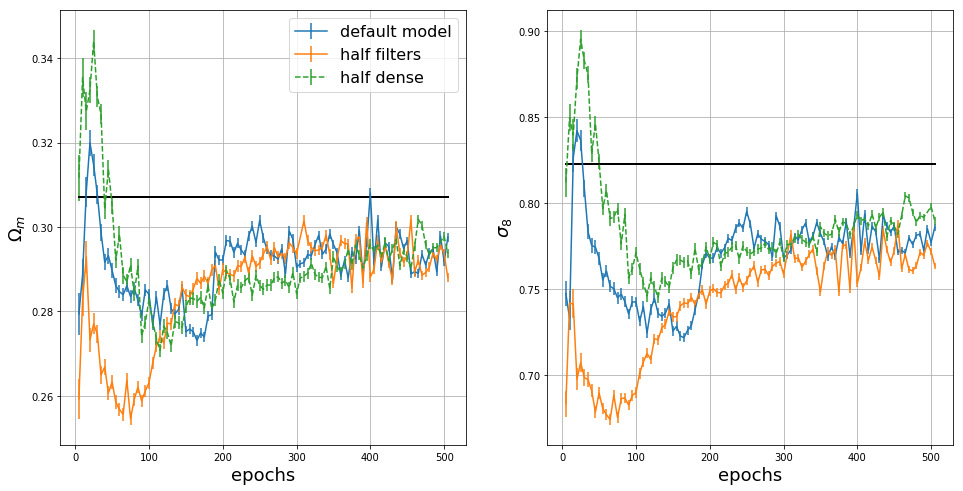

In [114]:
def filename_function(epochs):
    return 'half_dense/'+str(epochs)+'.save.test_output'
fig, axs, epochs_list, epochs_list_rlts = \
    learningcurve(filename_function, range(5,1000,5), var_name = 'epochs', 
                  curve_name = 'half dense', fig=fig, axs=axs, ls='--')
fig.savefig('halffilters_halfdense.png', format='png')
fig

##### pan models

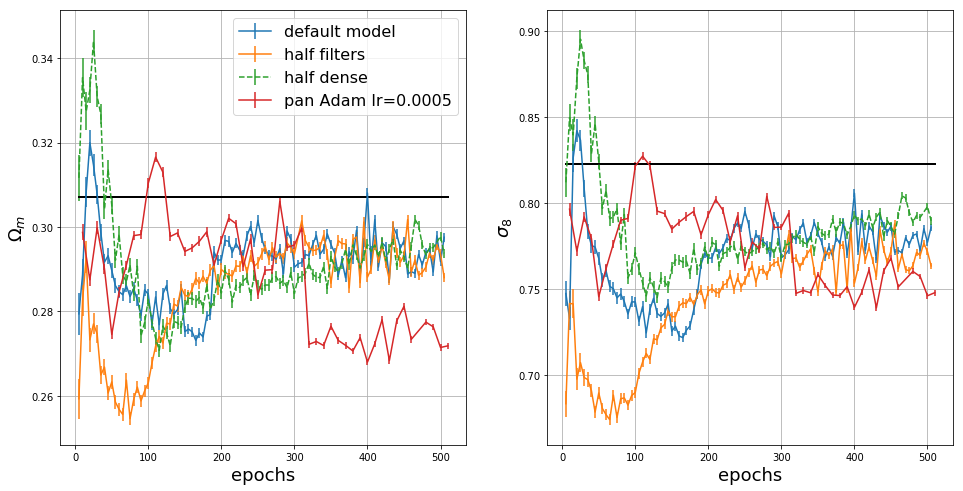

In [115]:
def filename_function(epochs):
    return 'pan_Adam_lr=0.0005//'+str(epochs)+'.save.test_output'
fig, axs, sgd_epochs_list, sgd_epochs_list_rlts = \
    learningcurve(filename_function, range(5,1000,5), var_name = 'epochs', 
                  curve_name = 'pan Adam lr=0.0005', fig=fig, axs=axs, ls='-')
fig.savefig('panAdam_halffilters_halfdense.png', format='png')
fig

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


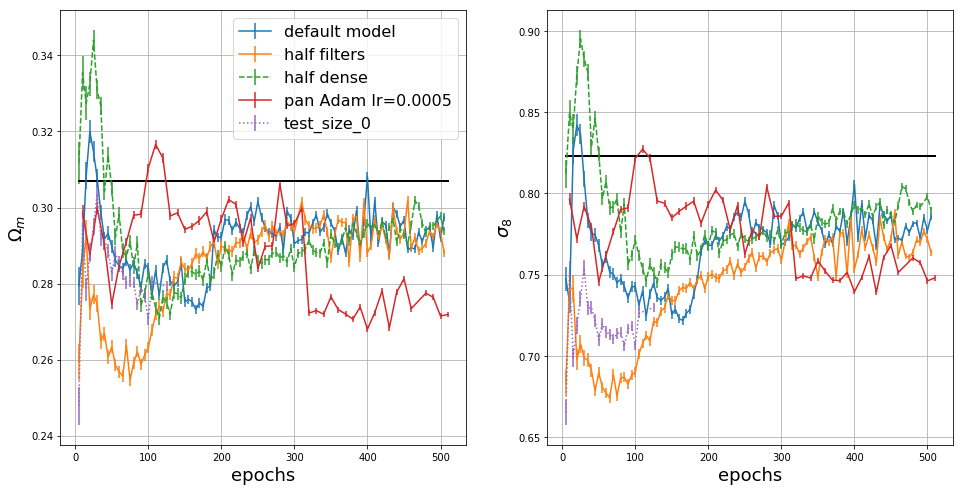

In [119]:
def filename_function(epochs):
    return './test_size_0.0/'+str(epochs)+'.save.test_output'
fig, axs, sgd_epochs_list, sgd_epochs_list_rlts = \
    learningcurve(filename_function, range(5,1000,5), var_name = 'epochs', 
                  curve_name = 'test_size_0', fig=fig, axs=axs, ls=':')
fig.savefig('testsize0_panAdam_halffilters_halfdense.png', format='png')
fig